In [2]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"]=(10,5)
import numpy as np

#import statistics
stats_sum3 = pd.read_csv('Clean4/statistics_sum3.csv', index_col=0)
stats_sum2 = pd.read_csv('Clean4/statistics_sum2.csv', index_col=0)
hist_sum3 = pd.read_csv('Clean4/stats_histograms_sum3.csv', index_col=0)
hist_sum2 = pd.read_csv('Clean4/stats_histograms_sum2.csv', index_col=0)

# Sample 2
* The sample is of all option packages awarded between 1999 and 2020. 
* All options expire BEFORE 2021.


# Guide

See the *BoardEx Progress Summary.pdf* for more details on what is going on. 

### The plots look at 
* *Ratio = Options Exercised / (Options Exercised + Exercisable Options + UnExercisable Options)* with appreviated name for the ratio as **sum 3**
* *Ratio = Options Exercised / (Options Exercised + Exercisable Options)* with appreviated name for the ratio as **sum 2**

Important: The ratio is the average ratio, not the aggregate ratio.

### How do I define *Options Exercised*?
1. Package **spread out** over vesting period
    * Options Exercised = (1/length of vesting period) * (number of options package)
    * Ex. If an executive has 1 over and a vesting period of 5 years then they exercise 0.2 of that option in each vesting year.
    
2. **median** vesting year
    * Assume that executive exercises option package at the median vesting period in the dataset (around 7-8)

### How do I count executives? 
* I count executatives according to their id and company id number. Note that there are several executives who simultaneously employed by different companies at the same time. 

### How do executives enter and leave the sample?
* An executive enters the sample when they are awarded their first option package. 
* An executive leaves the sample when they end up exercising all the options that they have. It is possible for someone who exercises all their options to be awarded more and reenter the sample. 
* There is information whether an executive leaves a company or not. Typically when an executive leaves they still can hold their optoins for a a 3 month - to one year period. Usually executives will exercise them all within three months of leaving. I assume that when an executive leaves they trigger all the options that they can.


# Number of executives per year 

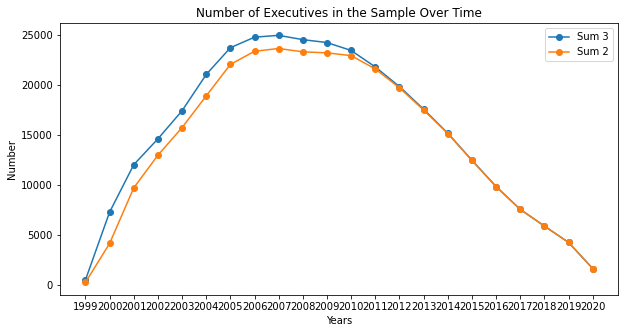

In [3]:
number_exec_sum3 = stats_sum3[stats_sum3.index == 'number_exec']
number_exec_sum2 = stats_sum2[stats_sum2.index == 'number_exec']
plt.plot(number_exec_sum3.columns, number_exec_sum3.T, marker='o')
plt.plot(number_exec_sum2.columns, number_exec_sum2.T, marker='o')
plt.title('Number of Executives in the Sample Over Time')
plt.legend(['Sum 3', 'Sum 2'])
plt.ylabel('Number')
plt.xlabel('Years')
plt.show()

# Histogram of Options by Number of Years Before Expiration

Duration = Year Option Expires - Year Option Awarded 

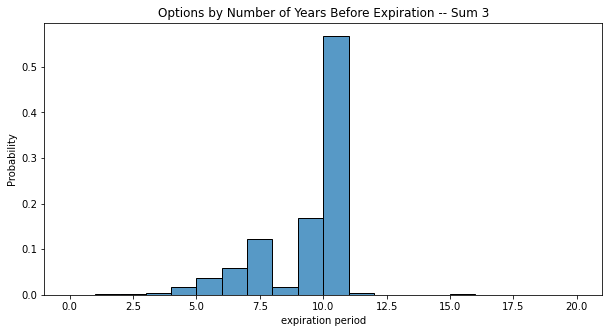

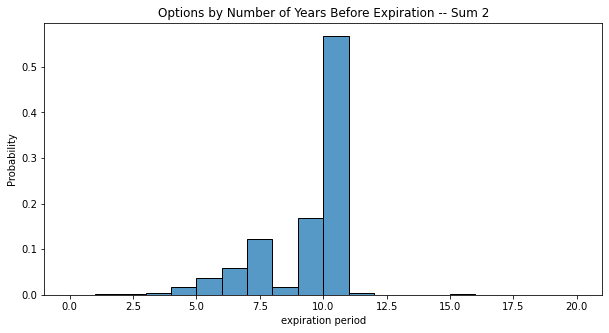

In [4]:
sns.histplot(data=hist_sum3['expiration period'], bins=20, stat="probability")
plt.title('Options by Number of Years Before Expiration -- Sum 3')
plt.show()

sns.histplot(data=hist_sum2['expiration period'], bins=20, stat="probability")
plt.title('Options by Number of Years Before Expiration -- Sum 2')
plt.show()

# Histogram of Vesting Periods
Vesting Period = Year Option Expires - Year Option Becomes Exercisable

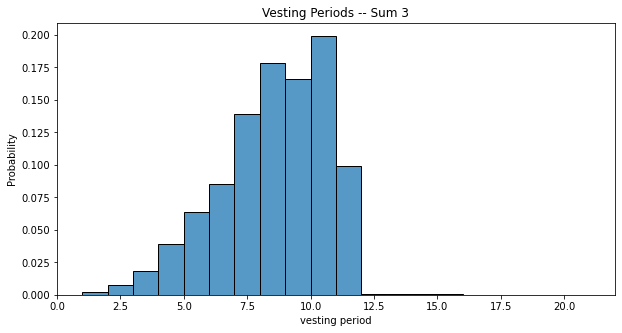

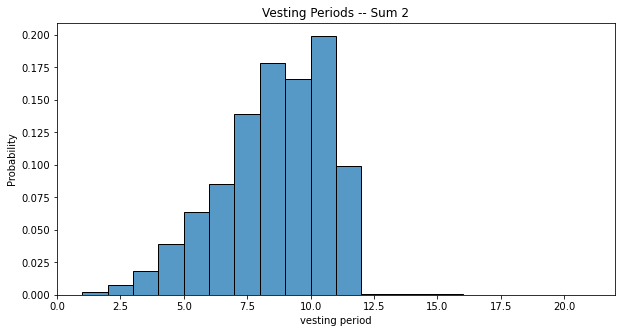

In [5]:
sns.histplot(data=hist_sum3['vesting period'], bins=20, stat="probability")
plt.title('Vesting Periods -- Sum 3')
plt.show()

sns.histplot(data=hist_sum2['vesting period'], bins=20, stat="probability")
plt.title('Vesting Periods -- Sum 2')
plt.show()

# Sum 3 Ratio and Options Excerised Spread Out

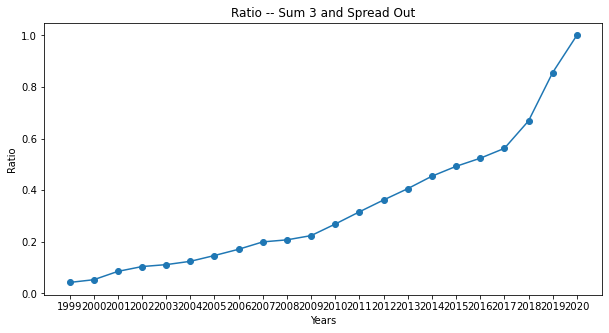

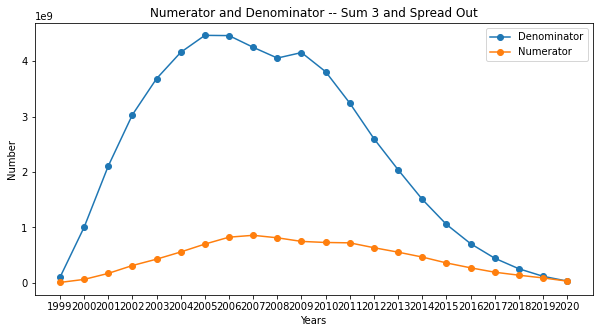

In [6]:
ratio_avg_sum3_spread = pd.read_csv('Clean4/ratio_avg_spread_sum3.csv', index_col=0)
plt.plot(ratio_avg_sum3_spread.columns, ratio_avg_sum3_spread.T, marker='o')
plt.title('Ratio -- Sum 3 and Spread Out')
plt.ylabel('Ratio')
plt.xlabel('Years')
plt.show()

denominator_spread_sum3 = stats_sum3[stats_sum3.index == 'denominator_total_stock_spread']
numerator_spread_sum3 = stats_sum3[stats_sum3.index == 'numerator_spread']
plt.plot(denominator_spread_sum3.columns, denominator_spread_sum3.T, marker='o')
plt.plot(numerator_spread_sum3.columns, numerator_spread_sum3.T, marker='o')
plt.title('Numerator and Denominator -- Sum 3 and Spread Out')
plt.legend(['Denominator', 'Numerator'])
plt.ylabel('Number')
plt.xlabel('Years')
plt.show()


# Sum 2 Ratio and Options Excerised Spread Out

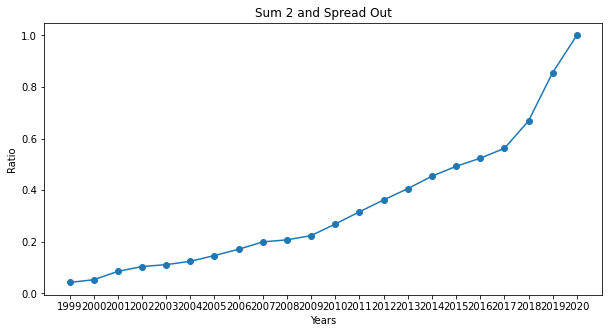

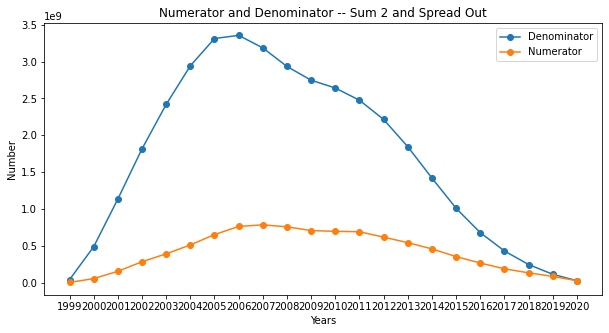

In [7]:
ratio_avg_sum2_spread = pd.read_csv('Clean4/ratio_avg_spread_sum2.csv', index_col=0)
plt.plot(ratio_avg_sum3_spread.columns, ratio_avg_sum3_spread.T, marker='o')
plt.title('Sum 2 and Spread Out')
plt.ylabel('Ratio')
plt.xlabel('Years')
plt.show()

denominator_spread_sum2 = stats_sum2[stats_sum2.index == 'denominator_total_stock_spread']
numerator_spread_sum2 = stats_sum2[stats_sum2.index == 'numerator_spread']
plt.plot(denominator_spread_sum2.columns, denominator_spread_sum2.T, marker='o')
plt.plot(numerator_spread_sum2.columns, numerator_spread_sum2.T, marker='o')
plt.title('Numerator and Denominator -- Sum 2 and Spread Out')
plt.legend(['Denominator', 'Numerator'])
plt.ylabel('Number')
plt.xlabel('Years')
plt.show()

# Sum 3 Ratio and Options Excerised at Median Year (~8 years)

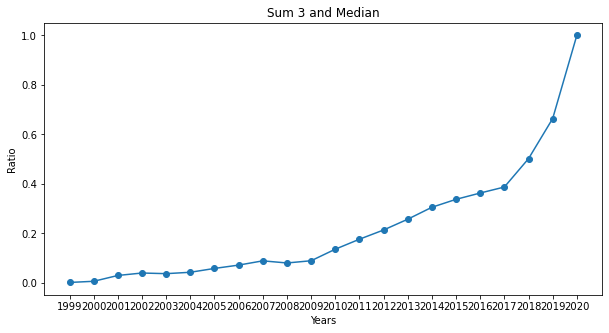

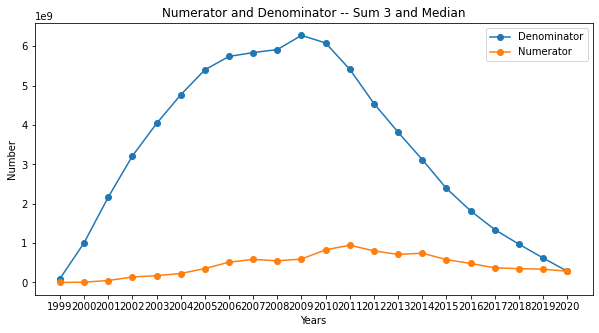

In [8]:
ratio_avg_sum3_median = pd.read_csv('Clean4/ratio_avg_median_sum3.csv', index_col=0)
plt.plot(ratio_avg_sum3_median.columns, ratio_avg_sum3_median.T, marker='o')
plt.title('Sum 3 and Median')
plt.ylabel('Ratio')
plt.xlabel('Years')
plt.show()

denominator_median_sum3 = stats_sum3[stats_sum3.index == 'denominator_total_stock_median']
numerator_median_sum3 = stats_sum3[stats_sum3.index == 'numerator_median']
plt.plot(denominator_median_sum3.columns, denominator_median_sum3.T, marker='o')
plt.plot(numerator_median_sum3.columns, numerator_median_sum3.T, marker='o')
plt.title('Numerator and Denominator -- Sum 3 and Median')
plt.legend(['Denominator', 'Numerator'])
plt.ylabel('Number')
plt.xlabel('Years')
plt.show()

# Sum 2 Ratio and Options Excerised at Median Year (~8 years)

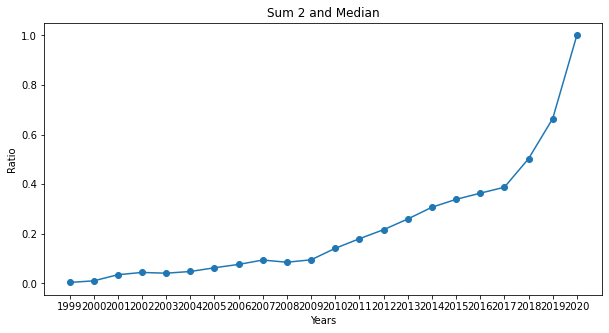

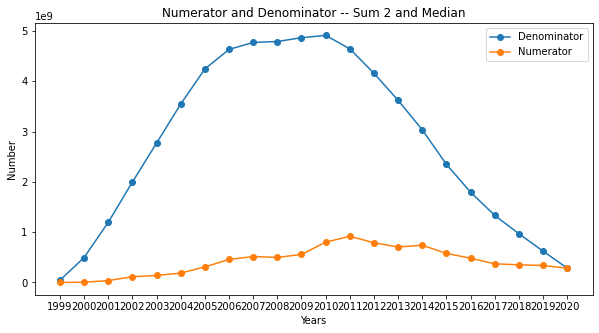

In [9]:
ratio_avg_sum2_median = pd.read_csv('Clean4/ratio_avg_median_sum2.csv', index_col=0)
plt.plot(ratio_avg_sum2_median.columns, ratio_avg_sum2_median.T, marker='o')
plt.title('Sum 2 and Median')
plt.ylabel('Ratio')
plt.xlabel('Years')
plt.show()

denominator_median_sum2 = stats_sum2[stats_sum2.index == 'denominator_total_stock_median']
numerator_median_sum2 = stats_sum2[stats_sum2.index == 'numerator_median']
plt.plot(denominator_median_sum2.columns, denominator_median_sum2.T, marker='o')
plt.plot(numerator_median_sum2.columns, numerator_median_sum2.T, marker='o')
plt.title('Numerator and Denominator -- Sum 2 and Median')
plt.legend(['Denominator', 'Numerator'])
plt.ylabel('Number')
plt.xlabel('Years')
plt.show()